In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
from matplotlib import pyplot as plt
import copy
from numpy import linalg as LA

In [3]:
adipose = (pd.read_csv("/data/users/cs15d017/backup_from_home/v8_experiments/mouse/data/adipose.txt", sep="\t")).fillna(0)
liver = (pd.read_csv("/data/users/cs15d017/backup_from_home/v8_experiments/mouse/data/liver.txt", sep="\t")).fillna(0)
muscle = (pd.read_csv("/data/users/cs15d017/backup_from_home/v8_experiments/mouse/data/muscle.txt", sep="\t")).fillna(0)
intestine = (pd.read_csv("/data/users/cs15d017/backup_from_home/v8_experiments/mouse/data/intestine.txt", sep="\t")).fillna(0)
hypothalamus = (pd.read_csv("/data/users/cs15d017/backup_from_home/v8_experiments/mouse/data/hypothalamus.txt", sep="\t")).fillna(0)
lep_target_genes = list(pd.read_csv("/data/users/cs15d017/backup_from_home/v8_experiments/mouse/data/leptin_target_genes_full_mouse.csv", header=None).values)
secreted_proteins = list(pd.read_csv("/data/users/cs15d017/backup_from_home/v8_experiments/mouse/data/Secreted_proteins_Uniprot.txt", sep = "\t")["Gene names  (primary )"].dropna().values)
print(hypothalamus)

            0610005C13Rik  0610007N19Rik  0610007P14Rik  0610009B22Rik  \
129X1/SvJ        1.494510       0.910743      10.457451      14.980033   
A/J              0.795336       1.319000       9.907373      16.300089   
AKR/J            1.091140       1.609043      10.731661      16.037444   
AXB12/PgnJ       1.331950       1.767060      11.531398      19.426033   
AXB13/PgnJ       0.674850       1.217025      10.675224      16.684500   
...                   ...            ...            ...            ...   
RIIIS/J          0.852615       2.128500      10.963093      16.401700   
SEA/GnJ          0.824984       1.858817      11.325275      18.524133   
SJL/J            1.654765       1.308405       9.968278      14.533233   
SM/J             0.703781       2.858927       9.552021      14.825033   
SWR/J            0.777540       1.773500       9.992906      16.558378   

            0610009D07Rik  0610009E02Rik,Gm13568  0610009L18Rik  \
129X1/SvJ       15.486743               0.96

In [4]:
lep_target_genes

[array(['Lepr'], dtype=object),
 array(['Leprotl1'], dtype=object),
 array(['Leprot'], dtype=object),
 array(['Nr1d1'], dtype=object),
 array(['Adipor1'], dtype=object),
 array(['Inhbb'], dtype=object),
 array(['Nr4a3'], dtype=object),
 array(['Mkks'], dtype=object),
 array(['Gck'], dtype=object),
 array(['Lrp2'], dtype=object),
 array(['Pten'], dtype=object),
 array(['Ugcg'], dtype=object),
 array(['Bbs2'], dtype=object),
 array(['Stat3'], dtype=object),
 array(['Bbs4'], dtype=object),
 array(['Mt3'], dtype=object),
 array(['Prmt2'], dtype=object),
 array(['Sirt1'], dtype=object),
 array(['Pid1'], dtype=object),
 array(['Ebi3'], dtype=object),
 array(['Lep'], dtype=object),
 array(['Lepr'], dtype=object),
 array(['Ccnd1'], dtype=object),
 array(['Nr4a3'], dtype=object),
 array(['Nkx2-1'], dtype=object),
 array(['Ccna2'], dtype=object),
 array(['Lepr_v1'], dtype=object),
 array(['Lepr_v2'], dtype=object),
 array(['Bbs4'], dtype=object),
 array(['Lep'], dtype=object),
 array(['Fdx1'], d

In [15]:
lep_target_genes=lep_target_genes[20]

In [3]:
#print(list(hypothalamus.columns))
#hyp_columns = hypothalamus.columns
#hyp_columns_new = [col.split(",", 1)[0] for col in hyp_columns]
#print(hyp_columns)
#print(len(hyp_columns_new))
hypothalamus.drop(list(hypothalamus.filter(regex = ',')), axis = 1, inplace = True)
print(hypothalamus.columns)

Index(['0610005C13Rik', '0610007N19Rik', '0610007P14Rik', '0610009B22Rik',
       '0610009D07Rik', '0610009L18Rik', '0610009O20Rik', '0610010F05Rik',
       '0610010K14Rik', '0610011F06Rik',
       ...
       'Zw10', 'Zwilch', 'Zwint', 'Zxdb', 'Zxdc', 'Zyg11b', 'Zyx', 'Zzef1',
       'Zzz3', 'NA'],
      dtype='object', length=15773)


In [12]:
hypothalamus["Lep"]

KeyError: 'Lep'

In [23]:
#hypothalamus.columns = hyp_columns_new
hypothalamus["Lep"] = np.random.uniform(low=0.0009, high=0.001, size=(hypothalamus.shape[0],))
print(hypothalamus.columns)

Index(['0610005C13Rik', '0610007N19Rik', '0610007P14Rik', '0610009B22Rik',
       '0610009D07Rik', '0610009E02Rik,Gm13568', '0610009L18Rik',
       '0610009O20Rik', '0610009O20Rik,Pcdh12', '0610010F05Rik',
       ...
       'Zwilch', 'Zwint', 'Zxdb', 'Zxdc', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3',
       'NA', 'Lep'],
      dtype='object', length=17785)


In [24]:
hypothalamus["Lep"]

129X1/SvJ     0.000963
A/J           0.000907
AKR/J         0.000952
AXB12/PgnJ    0.000989
AXB13/PgnJ    0.000980
                ...   
RIIIS/J       0.000912
SEA/GnJ       0.000956
SJL/J         0.000970
SM/J          0.000992
SWR/J         0.000989
Name: Lep, Length: 99, dtype: float64

In [5]:
adipose

,0610005C13Rik,0610007P14Rik,0610008F07Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010K14Rik,0610012G03Rik,0610031J06Rik,0610037L13Rik,...,Zswim7,Zufsp,Zw10,Zwilch,Zwint,Zxdc,Zyg11a,Zyg11b,Zyx,Zzz3
129X1/SvJ,4.061207,7.408284,3.664607,9.273777,9.484903,5.738023,6.604962,7.486168,8.524914,8.182206,...,7.022701,7.047774,6.532659,4.231749,6.563401,4.514036,3.790615,6.245811,7.048831,8.007807
A/J,5.046085,7.341836,3.670407,9.298691,9.652911,6.193326,6.741897,7.658022,8.629820,8.116566,...,7.150802,7.499861,6.509566,4.023749,6.834765,4.327815,3.619659,6.559879,6.642718,8.079251
AKR/J,4.882706,8.152045,3.669278,8.726242,9.902369,5.480947,7.119300,7.482294,8.955965,7.702598,...,6.478738,7.329497,6.657096,5.011337,7.155071,4.433360,3.110971,6.035758,7.395558,8.553367
AXB12/PgnJ,4.784281,7.668200,3.732754,9.373909,9.741572,6.048372,6.903989,7.575947,8.524699,8.008394,...,7.045262,7.480026,6.750043,3.720415,6.895995,4.431558,3.677324,6.571311,6.483981,8.057476
AXB15/PgnJ,4.118247,7.420584,3.534114,9.136012,9.611896,6.035697,6.959340,7.744013,8.454173,8.242704,...,7.143274,7.304136,6.298454,3.904002,7.017807,4.456219,3.755157,6.739848,7.003165,8.358375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RIIIS/J,4.202762,7.583241,3.614613,9.071048,9.741481,5.943597,6.970829,7.790641,8.618183,8.143410,...,7.401749,7.344231,6.591402,4.595489,6.837304,4.251314,3.411580,6.457697,7.189168,8.115536
SEA/GnJ,4.149188,7.535932,3.673219,9.199786,9.626056,6.032908,6.950341,7.641102,8.486406,8.342021,...,6.976919,7.281110,6.525371,4.257317,6.898126,4.467484,3.746478,6.262880,6.917020,8.089611
SJL/J,4.064175,7.392667,3.767312,9.152777,9.497049,6.070837,7.047278,7.967248,8.372907,8.030467,...,7.330630,7.371896,6.558857,3.986703,6.602647,4.466900,3.658191,6.479574,7.067961,8.410071
SM/J,4.021949,7.748538,3.713057,9.312145,9.852865,5.627021,6.854245,7.751899,8.854479,8.357175,...,6.697127,7.537724,6.769591,4.778060,6.786853,4.323479,3.389198,6.237188,6.862451,8.064535


In [25]:
hypothalamus = hypothalamus.fillna(0)
adipose = adipose.fillna(0)
liver = liver.fillna(0)
muscle = muscle.fillna(0)
intestine = intestine.fillna(0)
hypothalamus["Lep"]

129X1/SvJ     0.000963
A/J           0.000907
AKR/J         0.000952
AXB12/PgnJ    0.000989
AXB13/PgnJ    0.000980
                ...   
RIIIS/J       0.000912
SEA/GnJ       0.000956
SJL/J         0.000970
SM/J          0.000992
SWR/J         0.000989
Name: Lep, Length: 99, dtype: float64

In [26]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

genes = intersection(list(adipose.columns), list(hypothalamus.columns))
samples = intersection(list(adipose.index), list(hypothalamus.index))

print(genes)
print(samples)

print(np.shape(genes))
print(np.shape(samples))

#source_tissue = adipose[genes]#.loc[samples]
#target_tissue = hypothalamus[genes]#.loc[samples]

source_tissue = hypothalamus.loc[samples, genes]#adipose.loc[samples, genes]
target_tissue = adipose.loc[samples, genes]#hypothalamus.loc[samples, genes]

['0610005C13Rik', '0610007P14Rik', '0610009B22Rik', '0610009D07Rik', '0610009O20Rik', '0610010K14Rik', '0610031J06Rik', '0610037L13Rik', '0610040J01Rik', '1110001A16Rik', '1110001J03Rik', '1110004E09Rik', '1110004F10Rik', '1110007C09Rik', '1110008F13Rik', '1110008J03Rik', '1110008P14Rik', '1110012L19Rik', '1110032A03Rik', '1110037F02Rik', '1110038F14Rik', '1110051M20Rik', '1110054M08Rik', '1110057K04Rik', '1110058L19Rik', '1110059E24Rik', '1110059G10Rik', '1190002N15Rik', '1190005I06Rik', '1200014J11Rik', '1300017J02Rik', '1500015O10Rik', '1600012H06Rik', '1600014C10Rik', '1600029D21Rik', '1700001G17Rik', '1700001O22Rik', '1700010I14Rik', '1700017B05Rik', '1700019G17Rik', '1700019L03Rik', '1700020I14Rik', '1700021F05Rik', '1700028P14Rik', '1700029H14Rik', '1700030K09Rik', '1700037H04Rik', '1700052N19Rik', '1700088E04Rik', '1700094D03Rik', '1700123O20Rik', '1810009A15Rik', '1810011O10Rik', '1810019J16Rik', '1810026J23Rik', '1810030O07Rik', '1810032O08Rik', '1810037I17Rik', '1810043G02Ri

In [27]:
print(source_tissue.shape)
print(target_tissue.shape)

(94, 9996)
(94, 9996)


In [28]:
#genes = list(adipose.columns)
#print(genes)
print(lep_target_genes)
lep_target_indices = [i for i, e in enumerate(genes) if e in lep_target_genes]
print(lep_target_indices)

['Lep']
[4559]


In [31]:
#pcor = pg.pairwise_corr(adipose, method='bicor')
df = pd.concat([source_tissue, target_tissue], axis = 1)
#adip_hyp_corr = abs(df.corr(method = "spearman"))
hyp_adip_corr=abs(df.corr(method="spearman"))
print(df.shape)
#print(adip_hyp_corr.shape)
print(hyp_adip_corr.shape)

(94, 19992)
(19992, 19992)


In [33]:
#adip_hyp_corr
hyp_adip_corr

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010K14Rik,0610031J06Rik,0610037L13Rik,0610040J01Rik,1110001A16Rik,...,Zswim6,Zswim7,Zufsp,Zw10,Zwilch,Zwint,Zxdc,Zyg11b,Zyx,Zzz3
0610005C13Rik,1.000000,0.073843,0.055016,0.201098,0.154369,0.015323,0.176549,0.278445,0.031680,0.267681,...,0.069942,0.004125,0.066344,0.068266,0.028588,0.071213,0.147433,0.012188,0.089261,0.067384
0610007P14Rik,0.073843,1.000000,0.283661,0.280685,0.065824,0.166824,0.133923,0.093119,0.128331,0.131554,...,0.132132,0.003085,0.003345,0.212672,0.056388,0.143604,0.097222,0.158083,0.058556,0.149471
0610009B22Rik,0.055016,0.283661,1.000000,0.414644,0.098234,0.129213,0.240863,0.021869,0.077658,0.122032,...,0.188643,0.191533,0.221992,0.195896,0.176477,0.146436,0.090705,0.001597,0.039252,0.013546
0610009D07Rik,0.201098,0.280685,0.414644,1.000000,0.175191,0.016263,0.214319,0.061908,0.097482,0.494708,...,0.137189,0.179800,0.232352,0.301781,0.225301,0.176086,0.068699,0.006567,0.086703,0.184554
0610009O20Rik,0.154369,0.065824,0.098234,0.175191,1.000000,0.239779,0.194524,0.291594,0.047849,0.218957,...,0.074089,0.050016,0.004472,0.030307,0.007391,0.099173,0.066055,0.108261,0.069624,0.197197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zwint,0.071213,0.143604,0.146436,0.176086,0.099173,0.047921,0.054568,0.057761,0.043341,0.015699,...,0.173298,0.255110,0.213004,0.041896,0.178196,1.000000,0.086602,0.196547,0.084059,0.191562
Zxdc,0.147433,0.097222,0.090705,0.068699,0.066055,0.135527,0.094563,0.023661,0.070968,0.031189,...,0.039324,0.033428,0.053354,0.272348,0.108435,0.086602,1.000000,0.042676,0.022938,0.078958
Zyg11b,0.012188,0.158083,0.001597,0.006567,0.108261,0.062428,0.008373,0.099303,0.172749,0.100820,...,0.320637,0.050883,0.103984,0.103406,0.424166,0.196547,0.042676,1.000000,0.323758,0.143084
Zyx,0.089261,0.058556,0.039252,0.086703,0.069624,0.073670,0.093133,0.051924,0.039858,0.141827,...,0.480750,0.272535,0.123477,0.067572,0.399718,0.084059,0.022938,0.323758,1.000000,0.080822


In [70]:
liv_adp = pd.read_csv("./data/adp_int_bicor.csv", sep=",")

In [71]:
adp_int = abs(liv_adp)

In [72]:
adp_int.head()

,0610005C13Rik,0610007P14Rik,0610008F07Rik,0610009B22Rik,0610009D07Rik,0610009O20Rik,0610010K14Rik,0610012G03Rik,0610031J06Rik,0610037L13Rik,...,Zswim7.1,Zufsp.1,Zw10.1,Zwilch.1,Zwint.1,Zxdc.1,Zyg11a.1,Zyg11b.1,Zyx.1,Zzz3.1
0610005C13Rik,1.000000,0.041842,0.060409,0.207494,0.022501,0.212363,0.063926,0.218221,0.344724,0.045732,...,0.146638,0.237382,0.012606,0.031308,0.000110,0.014120,0.261543,0.142834,0.000095,0.044006
0610007P14Rik,0.041842,1.000000,0.034106,0.158897,0.472689,0.318218,0.098709,0.000836,0.431617,0.270809,...,0.203599,0.161254,0.030758,0.083727,0.163030,0.236457,0.196667,0.019129,0.018407,0.050770
0610008F07Rik,0.060409,0.034106,1.000000,0.053777,0.224147,0.016867,0.079169,0.070059,0.055382,0.028764,...,0.040800,0.074799,0.087808,0.107655,0.029548,0.103648,0.022037,0.046053,0.049346,0.019984
0610009B22Rik,0.207494,0.158897,0.053777,1.000000,0.421650,0.400091,0.354386,0.106783,0.272238,0.611780,...,0.417862,0.182123,0.364882,0.219382,0.364325,0.198893,0.234083,0.002697,0.221887,0.015854
0610009D07Rik,0.022501,0.472689,0.224147,0.421650,1.000000,0.354703,0.250486,0.175707,0.304864,0.354562,...,0.175210,0.023178,0.087619,0.161954,0.175662,0.070668,0.138091,0.067903,0.112537,0.124632


In [34]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
#    return vector / np.max(vector)
    return vector / np.linalg.norm(vector)
    #return vector / np.linalg.norm(vector, ord=1)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [35]:
def right_new_local_centrality_st(A_tilde_full, num_layers, target_tissue, target_gene_indices, p):
    print("target tissue id")
    print(target_tissue)
    print("right_new_local_centrality")
    num_target_genes = int(np.shape(target_gene_indices)[0])
    n = int(np.shape(A_tilde_full)[0]/num_layers)
    N = int(np.shape(A_tilde_full)[0])
    A_tilde_full = A_tilde_full/np.sum(A_tilde_full, axis=0)
    A_tilde = np.zeros_like(A_tilde_full)
    A_tilde[n:,n:] = A_tilde_full[n:,n:]
    np.fill_diagonal(A_tilde, 0.0)
    #A_tilde = A_tilde/LA.norm(A_tilde)
    
    ones_t = np.zeros((N,))
    ones_t[(np.asarray(target_gene_indices, dtype= np.int32) + n)] = 1/len(target_gene_indices)
    l = np.copy(ones_t)
    l_new = np.copy(ones_t)
    
    count = 0
    current_angle = np.zeros(3,)
    print("local centrality computation starts")
    while(count<200):
        print(count)
        count = count + 1
        l_new = (p* ((A_tilde).dot(l))) + (1-p)*ones_t
        current_angle[0] = current_angle[1]
        current_angle[1] = current_angle[2]
        current_angle[2] = angle_between(l, l_new)
        print(current_angle)
        if(((current_angle[0] == current_angle[1]) and (current_angle[1] == current_angle[2])) or (current_angle[2] == 0)):
            break
        #l = copy.deepcopy(l_new)
        l = copy.deepcopy(l_new)/LA.norm(l_new)
    print("l values")
    print(l)
    new_l = l/l.sum()# + l_tt/l_tt.sum()
    print("Target genes")
    print(target_gene_indices)
    return new_l

In [36]:
def right_target_global_centrality_t(A_tilde_full, num_layers, target_tissue, target_gene_indices, p):
    l = right_new_local_centrality_st(A_tilde_full, num_layers, target_tissue, target_gene_indices, p) #last checkpoint
    #A_tilde = copy.deepcopy(A_tilde_full)
    A_tilde = A_tilde_full/np.sum(A_tilde_full, axis=0)
    N = int(np.shape(A_tilde)[0])
    n = int(N/num_layers)
    print("A_tilde sums")
    print(np.sum(A_tilde[0,:]))
    print(np.sum(A_tilde[:,0]))
        
    A = np.zeros_like(A_tilde_full)
    C = np.zeros_like(A_tilde_full)
    A[:n,:n] = copy.deepcopy(A_tilde[:n,:n])
    A[n:,n:] = copy.deepcopy(A_tilde[n:,n:])
    C[:n,n:] = copy.deepcopy(A_tilde[:n,n:])
    C[n:,:n] = copy.deepcopy(A_tilde[n:,:n])
    
    
    print("finding target global centrality for layer " + str(target_tissue))
    
    ones_t = np.zeros((N,))
    ones_t[(np.asarray(target_gene_indices, dtype= np.int32) + n)] = 1/len(target_gene_indices)
    g = np.copy(ones_t)
    g_new = np.copy(ones_t)
    
    
    counter = 0
    current_angle = np.zeros(3,)
    while(counter<200):
        g_new = (p * ((A+C).dot(g) + (C.dot(l)) )) + ((1-p)*ones_t)

        current_angle[0] = current_angle[1]
        current_angle[1] = current_angle[2]
        current_angle[2] = angle_between(g, g_new)
        print(current_angle)
        if(((current_angle[0] == current_angle[1]) and (current_angle[1] == current_angle[2])) or (current_angle[2] == 0)):
            break
        g = copy.deepcopy(g_new)/LA.norm(g_new)
        counter+=1
        print(counter)
        print(np.sum(g))
    new_g = g/g.max()
    return new_g


target tissue id
1
right_new_local_centrality
local centrality computation starts
0
[0.         0.         0.06719897]
1
[0.         0.06719897 0.33381712]
2
[0.06719897 0.33381712 0.78404608]
3
[0.33381712 0.78404608 0.21848655]
4
[0.78404608 0.21848655 0.01068491]
5
[0.21848655 0.01068491 0.00071465]
6
[0.01068491 0.00071465 0.00016766]
7
[7.14648619e-04 1.67661381e-04 4.49627866e-05]
8
[1.67661381e-04 4.49627866e-05 1.22395330e-05]
9
[4.49627866e-05 1.22395330e-05 3.34384182e-06]
10
[1.22395330e-05 3.34384182e-06 9.14450645e-07]
11
[3.34384182e-06 9.14450645e-07 2.50233049e-07]
12
[9.14450645e-07 2.50233049e-07 6.49526558e-08]
13
[2.50233049e-07 6.49526558e-08 0.00000000e+00]
l values
[0.         0.         0.         ... 0.00960773 0.01240563 0.0063554 ]
Target genes
[4559]
A_tilde sums
0.8092597383757466
1.000000000000001
finding target global centrality for layer 1
[0.         0.         0.09505946]
1
12.662807150510215
[0.         0.09505946 0.61070395]
2
89.36039260642167
[0.09

(array([  9.,  17.,  34.,  55.,  81., 126., 199., 210., 273., 310., 347.,
        375., 441., 492., 472., 491., 490., 506., 493., 490., 429., 437.,
        367., 405., 360., 340., 259., 226., 191., 189., 175., 142., 119.,
        101.,  87.,  59.,  42.,  50.,  30.,  29.,  23.,  12.,   5.,   4.,
          3.,   1.]),
 array([0.03194279, 0.03293128, 0.03391978, 0.03490827, 0.03589677,
        0.03688526, 0.03787376, 0.03886225, 0.03985075, 0.04083924,
        0.04182774, 0.04281623, 0.04380473, 0.04479322, 0.04578172,
        0.04677021, 0.04775871, 0.0487472 , 0.0497357 , 0.0507242 ,
        0.05171269, 0.05270119, 0.05368968, 0.05467818, 0.05566667,
        0.05665517, 0.05764366, 0.05863216, 0.05962065, 0.06060915,
        0.06159764, 0.06258614, 0.06357463, 0.06456313, 0.06555162,
        0.06654012, 0.06752861, 0.06851711, 0.0695056 , 0.0704941 ,
        0.07148259, 0.07247109, 0.07345959, 0.07444808, 0.07543658,
        0.07642507, 0.07741357]),
 <BarContainer object of 46 artists>

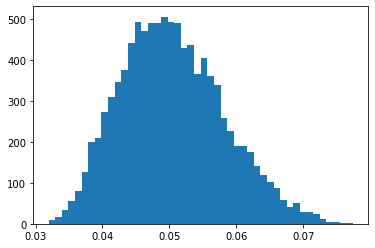

In [38]:
n = len(genes)
L = 2
N = n * L
g = right_target_global_centrality_t(hyp_adip_corr.values, num_layers=2, target_tissue = 1, target_gene_indices=lep_target_indices, p=0.9)
plt.hist(g[:n], bins = 'auto')

In [39]:
order = g[:n].argsort()
ranks = order.argsort()
ranks_cen = copy.deepcopy(ranks)
print(order)
print(ranks)

d = {'gene_name': genes, 'centrality': g[:n], 'rank': n-ranks}
results = pd.DataFrame(data=d)
print(results.shape)
print(results)
results.to_csv("hyp_adp_Leptin_reverse_results_0.9.csv")

#filtered_results = results[results.gene_name.isin(secreted_proteins)]
#filtered_results_cen = filtered_results
#filtered_results.to_csv("adp_hyp_Leptin_results_filtered_0.9.csv")


[3597 2269 7873 ... 9388 5475 3952]
[1982 4437 8436 ... 9095 9425 6524]
(9996, 3)
          gene_name  centrality  rank
0     0610005C13Rik    0.043682  8014
1     0610007P14Rik    0.048787  5559
2     0610009B22Rik    0.058376  1560
3     0610009D07Rik    0.063101   630
4     0610009O20Rik    0.047610  6142
...             ...         ...   ...
9991          Zwint    0.053681  3224
9992           Zxdc    0.057050  1938
9993         Zyg11b    0.061515   901
9994            Zyx    0.063516   571
9995           Zzz3    0.053086  3472

[9996 rows x 3 columns]


In [178]:
# inter_layer target degree calculation
lep_deg = np.sum(adp_int.values[:n,lep_target_indices], axis = 1)
print(lep_deg)
order = lep_deg.argsort()
ranks = order.argsort()
print(order)
print(ranks)
d = {'gene_name': genes, 'centrality': lep_deg, 'rank': n-ranks}
results = pd.DataFrame(data=d)
print(results.shape)
print(results)
results.to_csv("./data/adp_int_Leptin_target_interlayer_deg.csv")

filtered_results = results[results.gene_name.isin(secreted_proteins)]
filtered_results_deg = filtered_results
filtered_results.to_csv("./data/adp_int_Leptin_target_interlayer_deg_filtered.csv")

[4.89154459 6.54879147 2.34627496 ... 6.31035041 8.17000464 3.30447131]
[9112 8274 5075 ... 3258 5785 4063]
[ 6446  8494   504 ...  8251 10031  2892]
(12242, 3)
           gene_name  centrality   rank
0      0610005C13Rik    4.891545   5796
1      0610007P14Rik    6.548791   3748
2      0610008F07Rik    2.346275  11738
3      0610009B22Rik    8.522566   1896
4      0610009D07Rik    7.689169   2639
...              ...         ...    ...
12237           Zxdc    3.059328  10106
12238         Zyg11a    6.499362   3798
12239         Zyg11b    6.310350   3991
12240            Zyx    8.170005   2211
12241           Zzz3    3.304471   9350

[12242 rows x 3 columns]


In [129]:
# inter_layer all degree calculation
lep_deg = np.sum(adp_int.values[:n,n:], axis = 1)
print(lep_deg)
order = lep_deg.argsort()
ranks = order.argsort()
print(order)
print(ranks)
d = {'gene_name': genes, 'centrality': lep_deg, 'rank': n-ranks}
results = pd.DataFrame(data=d)
print(results.shape)
print(results)
results.to_csv("./data/adp_int_Leptin_all_interlayer_deg.csv")

filtered_results = results[results.gene_name.isin(secreted_proteins)]
filtered_results.to_csv("./data/adp_int_Leptin_all_interlayer_deg_filtered.csv")

[1185.72190185 1209.70711099  979.33086008 ... 1167.89214672 1397.42972798
 1135.81296458]
[ 3983  1338 10664 ...  2377 11758  7213]
[4739 5181 1085 ... 4425 8408 3858]
(12242, 3)
           gene_name   centrality   rank
0      0610005C13Rik  1185.721902   7503
1      0610007P14Rik  1209.707111   7061
2      0610008F07Rik   979.330860  11157
3      0610009B22Rik  1678.930407    697
4      0610009D07Rik  1178.074898   7645
...              ...          ...    ...
12237           Zxdc  1009.095894  10666
12238         Zyg11a  1204.139865   7175
12239         Zyg11b  1167.892147   7817
12240            Zyx  1397.429728   3834
12241           Zzz3  1135.812965   8384

[12242 rows x 3 columns]


In [130]:
sum(adp_int.isnull().any())

0

In [125]:
secreted_proteins

['A1bg',
 'A2m',
 'A2mp',
 'Abhd15',
 'Abhd17a',
 'Abhd17b',
 'Abo',
 'Acan',
 'Ace',
 'Ace2',
 'Ache',
 'Acpp',
 'Acrbp',
 'Adam17',
 'Adam23',
 'Adamdec1',
 'Adamts1',
 'Adamts10',
 'Adamts12',
 'Adamts13',
 'Adamts15',
 'Adamts16',
 'Adamts18',
 'Adamts19',
 'Adamts2',
 'Adamts20',
 'Adamts4',
 'Adamts5',
 'Adamts7',
 'Adamts8',
 'Adamtsl1',
 'Adamtsl2',
 'Adamtsl4',
 'Adamtsl5',
 'Adck1',
 'Adcyap1',
 'Adcyap1',
 'Adcyap1',
 'Adipoq',
 'Adipoq',
 'Adipoq',
 'Adipor1',
 'Adipor2',
 'Adm',
 'Adm2',
 'Adpgk',
 'Aebp1',
 'Afm',
 'Afp',
 'Aggf1',
 'Agr2',
 'Agrn',
 'Agrp',
 'Agt',
 'Ahsg',
 'Aimp1',
 'Alb',
 'Alk',
 'Ambn',
 'Ambp',
 'Amelx',
 'Amh',
 'Amh',
 'Amh',
 'Amtn',
 'Amy1',
 'Amy2',
 'Ang',
 'Ang2',
 'Ang3',
 'Ang4',
 'Angpt1',
 'Angpt2',
 'Angpt4',
 'Angptl1',
 'Angptl2',
 'Angptl3',
 'Angptl4',
 'Angptl6',
 'Angptl7',
 'Anxa1',
 'Anxa2',
 'Aoah',
 'Aoc1',
 'Apcs',
 'Apela',
 'Apln',
 'Apoa1',
 'Apoa1',
 'Apoa1',
 'Apoa1bp',
 'Apoa2',
 'Apoa4',
 'Apoa4',
 'Apoa4',
 'Apoa5',
 

Index(['Entry', 'Entry name', 'Status', 'Gene names', 'Organism', 'Length',
       'Gene names  (primary )'],
      dtype='object')

In [131]:
adp_int_p = pd.read_csv("./data/adp_int_p.csv", sep=",")

In [140]:
adp_int_p_log = -np.log2(adp_int_p.iloc[:n,n:])

In [134]:
adp_int_p_log.replace(np.inf, 0, inplace=True)

In [153]:
adp_int_p_log.iloc[:,lep_target_indices]

,Adipor1.1,Bbs2.1,Ccna2.1,Ccnd1.1,Ebi3.1,Edn1.1,Fdx1.1,Fgb.1,Fgf23.1,Gck.1,...,Mt3.1,Nr1d1.1,Nr4a3.1,Pdia3.1,Prmt2.1,Pten.1,Sirt1.1,Star.1,Stat3.1,Ugcg.1
0610005C13Rik,1.925693,0.085199,7.750004,0.668875,1.309110,0.251573,2.040176,3.975066,2.118461,2.429122,...,0.050952,1.970215,1.087565,4.519300,1.977872,1.292158,2.015873,0.265437,0.367407,0.133111
0610007P14Rik,4.907726,0.205763,6.034047,0.626792,0.092894,0.287316,6.375489,3.335959,1.470507,4.812476,...,2.875003,3.674377,0.888402,3.655145,3.413925,1.533229,0.580418,3.781100,1.368337,1.806067
0610008F07Rik,5.534889,1.795210,0.356768,0.038932,2.226912,2.492060,0.223096,0.263995,0.757585,4.852957,...,0.540535,0.212193,1.742742,4.261965,0.297778,0.504180,0.351508,3.311107,0.289186,1.939316
0610009B22Rik,0.361949,8.215717,0.480954,1.797448,6.724545,6.044006,7.863928,1.114241,2.440435,1.275202,...,1.690725,3.560593,0.110439,2.198884,0.705754,8.261940,2.269539,0.978942,2.362882,1.089889
0610009D07Rik,0.540558,2.891487,0.159324,1.458324,1.690434,1.699660,3.101656,0.389108,0.989370,0.984848,...,1.204705,0.295597,0.326374,2.164479,1.588956,2.816551,1.268186,3.361677,7.350645,1.688358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zxdc,5.667153,0.756999,1.887429,0.752115,0.128433,2.682167,0.716944,1.231866,1.672937,1.597998,...,3.078987,0.357965,4.631342,1.985189,4.661885,1.980294,2.497123,1.734561,0.510290,2.222193
Zyg11a,2.595858,0.503270,3.494398,1.708212,0.034066,0.776435,8.137564,0.730139,1.323754,7.724889,...,2.514591,2.276320,1.755551,3.172298,1.488509,1.561170,0.570064,2.645835,2.084891,2.631484
Zyg11b,2.753976,0.159235,2.048914,1.763458,0.748357,1.683832,1.423047,2.439002,0.705078,2.623436,...,0.394843,0.835086,3.581253,2.431768,1.115468,0.077190,5.488963,0.811850,0.123249,6.363781
Zyx,0.695556,9.727066,1.048959,0.789672,4.120789,3.407354,4.717351,1.569156,1.042745,0.630332,...,0.212645,2.093816,0.149828,1.244713,0.218601,5.010574,0.351424,0.061397,0.053532,1.001394


In [154]:
s_sec_scores = adp_int_p_log.sum(axis = 1)

In [155]:
s_sec_scores.shape

(12242,)

In [156]:
np.shape(s_sec_scores.values)

(12242,)

In [157]:
s_sec_scores.values

array([23951.91353931, 24805.46290783, 18217.28768621, ...,
       23649.79855464, 30508.14203045, 22650.73667191])

In [179]:
final_score = s_sec_scores.values
order = final_score.argsort()
ranks = order.argsort()
ranks_s_sec = copy.deepcopy(ranks)
print(order)
print(ranks)
d = {'gene_name': genes, 'centrality': final_score, 'rank': n-ranks}
results = pd.DataFrame(data=d)
print(results.shape)
print(results)
results.to_csv("./data/adp_int_Leptin_target_s_sec.csv")

filtered_results = results[results.gene_name.isin(secreted_proteins)]
filtered_results_s_sec = filtered_results
filtered_results.to_csv("./data/adp_int_Leptin_target_interlayer_s_sec_filtered.csv")

[ 3983  1338 10664 ...  2377 11758  7213]
[4674 5185 1077 ... 4488 8155 3913]
(12242, 3)
           gene_name    centrality   rank
0      0610005C13Rik  23951.913539   7568
1      0610007P14Rik  24805.462908   7057
2      0610008F07Rik  18217.287686  11165
3      0610009B22Rik  40903.555826    808
4      0610009D07Rik  23861.398513   7630
...              ...           ...    ...
12237           Zxdc  19070.728522  10655
12238         Zyg11a  24802.222430   7059
12239         Zyg11b  23649.798555   7754
12240            Zyx  30508.142030   4087
12241           Zzz3  22650.736672   8329

[12242 rows x 3 columns]


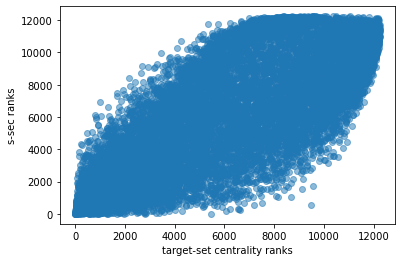

In [181]:
plt.scatter(ranks_cen, ranks_s_sec,alpha=0.5)
plt.xlabel('target-set centrality ranks')
plt.ylabel('s-sec ranks') 
plt.show()

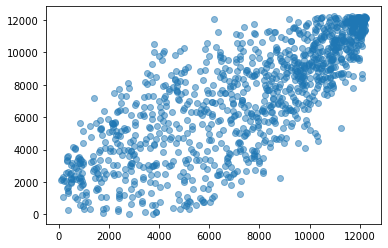

In [173]:
plt.scatter(filtered_results_cen["rank"], filtered_results_s_sec["rank"],alpha=0.5)
plt.show()

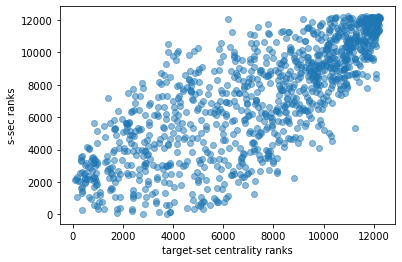

In [180]:
plt.scatter(filtered_results_cen["rank"], filtered_results_s_sec["rank"],alpha=0.5)
plt.xlabel('target-set centrality ranks')
plt.ylabel('s-sec ranks') 
plt.show()

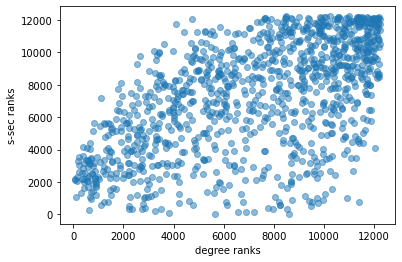

In [182]:
plt.scatter(filtered_results_deg["rank"], filtered_results_s_sec["rank"],alpha=0.5)
plt.xlabel('degree ranks')
plt.ylabel('s-sec ranks') 
plt.show()

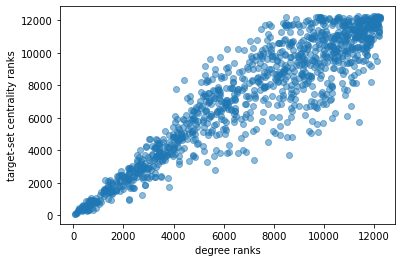

In [183]:
plt.scatter(filtered_results_deg["rank"], filtered_results_cen["rank"],alpha=0.5)
plt.xlabel('degree ranks')
plt.ylabel('target-set centrality ranks') 
plt.show()

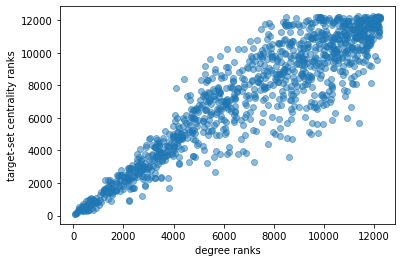

In [189]:
plt.scatter(filtered_results_deg["rank"], filtered_results_cen["rank"],alpha=0.5)
plt.xlabel('degree ranks')
plt.ylabel('target-set centrality ranks') 
plt.show()